In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.image import imread
import zipfile 
import os

## Data dir

In [2]:
#zip_obj = zipfile.ZipFile("resources/nbaPlayers.zip", mode="r")

In [3]:
#zip_obj.extractall("resources/")

In [31]:
data_dir = "resources/nbaPlayers/"

In [32]:
os.listdir(data_dir)

['.DS_Store', 'test', 'train']

In [33]:
train_dir = data_dir+"train"

In [34]:
os.listdir(train_dir)[1:]

['jordan', 'kobe']

In [35]:
test_dir =data_dir+"test"

In [9]:
os.listdir(test_dir)

['jordan', 'kobe']

## looking at an umage

In [10]:
os.listdir(test_dir+"/jordan")

['images (1).jpeg',
 'images (2).jpeg',
 'images (3).jpeg',
 'images (4).jpeg',
 'images.jpeg']

In [11]:
sample_image = test_dir+"/jordan"+"/images (1).jpeg"

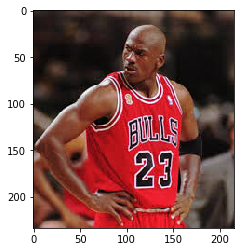

In [12]:
plt.imshow(imread(sample_image))

In [13]:
imread(sample_image).shape

(234, 216, 3)

In [14]:
sample_image_array = imread(sample_image)

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [24]:
generator = ImageDataGenerator

In [25]:
generator = ImageDataGenerator (
    rotation_range=0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=None,
    shear_range=0.2,
    zoom_range=0.3,
    fill_mode='nearest',
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1/255
)

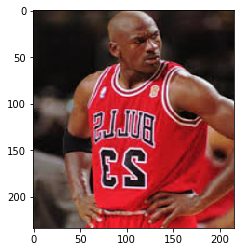

In [26]:
plt.imshow(generator.random_transform(sample_image_array))

In [27]:
generator.flow_from_directory(test_dir)

Found 10 images belonging to 2 classes.


In [28]:
generator.flow_from_directory(train_dir)

Found 18 images belonging to 2 classes.


### Getting average size for images
- Will need this to pass to the model

In [36]:
os.listdir(test_dir)

['jordan', 'kobe']

In [39]:
dim1 = []
dim2 = []
for image_name in os.listdir(test_dir+"/kobe"):
    img = imread(test_dir+"/kobe/"+image_name)
    d1,d2,c = img.shape
    dim1.append(d1)
    dim2.append(d2)

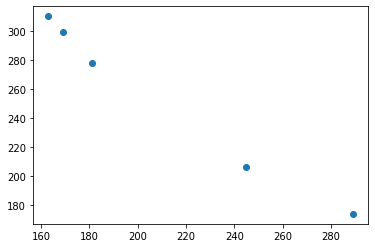

In [40]:
plt.scatter(dim1,dim2)

In [41]:
np.mean(dim1)

209.4

In [43]:
np.mean(dim2)

253.4

In [44]:
target_size = (200,250,3)

In [45]:
train_gen = generator.flow_from_directory?

In [46]:
train_gen = generator.flow_from_directory (
  train_dir,
    target_size=target_size[:2],
    color_mode='rgb',
    classes=None,
    class_mode='binary',
    batch_size=2,
    shuffle=True,
)

Found 18 images belonging to 2 classes.


In [47]:
test_gen = generator.flow_from_directory (
  test_dir,
    target_size=target_size[:2],
    color_mode='rgb',
    classes=None,
    class_mode='binary',
    batch_size=2,
    shuffle=False,
)

Found 10 images belonging to 2 classes.


### Creating the model
- We will use the generators along with a Convolutional network for our classificaiton

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten

In [53]:
model = Sequential()
model.add(Conv2D(filters = 32, padding = "same", kernel_size = (2,2), activation ="relu", input_shape = target_size))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(filters = 32, padding = "same", kernel_size = (2,2), activation ="relu", input_shape = target_size))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(filters = 32, padding = "same", kernel_size = (2,2), activation ="relu", input_shape = target_size))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(units = 120, activation = "relu"))
model.add(Dense(units = 80, activation = "relu"))
model.add(Dense(units = 1, activation = "sigmoid"))
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

### fitting the generartors to the model

In [54]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 200, 250, 32)      416       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 100, 125, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 100, 125, 32)      4128      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 50, 62, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 50, 62, 32)        4128      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 25, 31, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 24800)            

In [55]:
model.fit_generator(train_gen, validation_data=test_gen, epochs=10)

Epoch 1/10
9/9 [==============================] - 6s 714ms/step - loss: 0.8197 - accuracy: 0.4444 - val_loss: 0.8031 - val_accuracy: 0.5000
Epoch 2/10
9/9 [==============================] - 6s 643ms/step - loss: 0.6862 - accuracy: 0.5556 - val_loss: 0.6743 - val_accuracy: 0.5000
Epoch 3/10
9/9 [==============================] - 6s 631ms/step - loss: 0.6353 - accuracy: 0.5556 - val_loss: 0.6365 - val_accuracy: 0.9000
Epoch 4/10
9/9 [==============================] - 6s 632ms/step - loss: 0.5780 - accuracy: 0.7222 - val_loss: 0.5696 - val_accuracy: 0.8000
Epoch 5/10
9/9 [==============================] - 6s 638ms/step - loss: 0.4500 - accuracy: 0.7778 - val_loss: 0.4980 - val_accuracy: 0.8000
Epoch 6/10
9/9 [==============================] - 6s 637ms/step - loss: 0.3145 - accuracy: 0.8889 - val_loss: 0.5818 - val_accuracy: 0.6000
Epoch 7/10
9/9 [==============================] - 6s 654ms/step - loss: 0.8465 - accuracy: 0.7222 - val_loss: 1.0638 - val_accuracy: 0.5000
Epoch 8/10
9/9 [====

### Model Performance

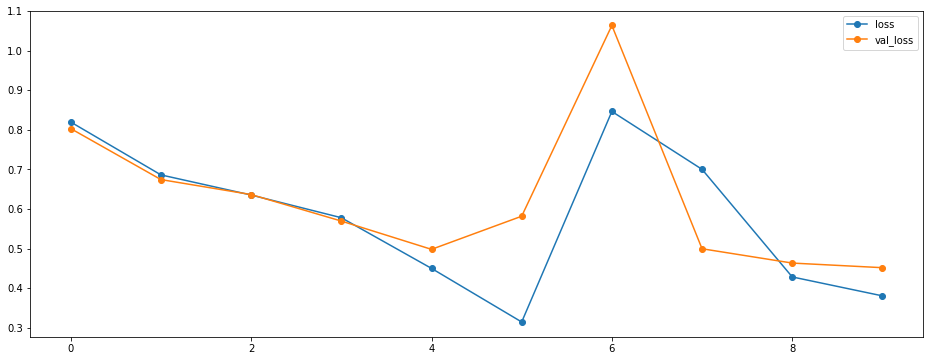

In [61]:
pd.DataFrame(model.history.history)[["loss", "val_loss"]].plot(figsize = (16,6), marker = "o")

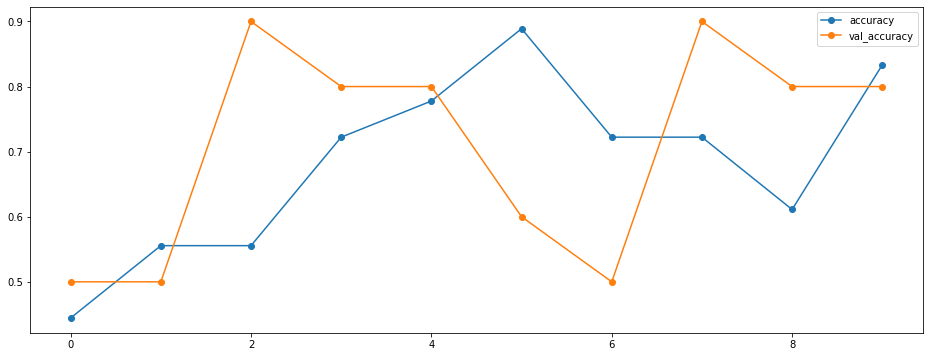

In [62]:
pd.DataFrame(model.history.history)[["accuracy", "val_accuracy"]].plot(figsize = (16,6), marker = "o")

### Model OVerview
- Model prediciton is about 80% so we will save this model

In [63]:
##model.save("model/jordan_kobe.h5")

In [65]:
#pd.DataFrame(model.history.history).to_csv("model/model_history_v1.csv")

### Making predicitons on testing data 

In [84]:
predicitons = model.predict(test_gen)

In [85]:
predicitons

array([[0.28818363],
       [0.2905331 ],
       [0.31286925],
       [0.28193513],
       [0.5162747 ],
       [0.86657506],
       [0.7276014 ],
       [0.6411635 ],
       [0.5381184 ],
       [0.33684653]], dtype=float32)

In [94]:
len(predicitons)

10

In [95]:
pred = predicitons > .5

In [96]:
len(pred)

10

In [97]:
len(test_gen.classes)

10

### Metrics

In [98]:
from sklearn.metrics import classification_report, confusion_matrix

In [99]:
print(confusion_matrix(pred, test_gen.classes))

[[4 1]
 [1 4]]


In [100]:
print(classification_report(pred, test_gen.classes))

              precision    recall  f1-score   support

       False       0.80      0.80      0.80         5
        True       0.80      0.80      0.80         5

    accuracy                           0.80        10
   macro avg       0.80      0.80      0.80        10
weighted avg       0.80      0.80      0.80        10



### Testing on random images

# Jordan

In [115]:
from random import randint
random_ind = randint(1, len(os.listdir(test_dir+"/jordan")))
random_img_name = os.listdir(test_dir+"/jordan")[random_ind]

In [116]:
random_img_name

'images (4).jpeg'

In [117]:
rand_jordan_image_path = test_dir+"/jordan/"+random_img_name

In [118]:
rand_jordan_image_path

'resources/nbaPlayers/test/jordan/images (4).jpeg'

### Importing image and presenting

In [119]:
from tensorflow.keras.preprocessing import image

In [122]:
imported_image = image.load_img(rand_jordan_image_path, target_size=target_size)

In [126]:
imported_image_array = image.img_to_array(imported_image)

### We have the image shape, Whats next 
- The image has the dimamsions the model 
- WE need to add one more dimension to tell the model the count of images we are adding

In [127]:
imported_image_array.shape

(200, 250, 3)

In [128]:
image_to_predict = np.expand_dims(imported_image_array, axis=0)

In [130]:
image_to_predict.shape

(1, 200, 250, 3)

### Model prediction

In [131]:
model.predict(image_to_predict)

array([[0.]], dtype=float32)

## Results 
- The model is telling us this is classified as 0
- WE know this is a jordan image 
- lets take a look at the classes

In [133]:
train_gen.class_indices

{'jordan': 0, 'kobe': 1}